# Python for Data Science, Level I
### *Session \#8*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Timeseries Data
---

### Warm Ups

In [1]:
import pandas as pd
import numpy as np
import requests
from matplotlib import pyplot as plt
#%matplotlib inline

url = 'https://data.nasdaq.com/api/v3/datasets/WIKI/AAPL.csv'
api_key = "api_key=K2km7t6m9xhmYRD7zCPY"
query_string = '?'+'&'.join([api_key])

**Read CSV of timeseries data:**

In [2]:
df = pd.read_csv(url+query_string, parse_dates=['Date'], index_col='Date')

**Sort rows by date:** `df.sort_values('Date', inplace=True)`

In [3]:
df.sort_values('Date', inplace=True, ascending=True)

**Grab year/month/day of data with partial string index:** 
```python
df.loc['2017']
df.loc['2017-02']
df.loc['2017-02-01']
```

**Grab slice with partial string index:** `df.loc['2017-01':'2017-03']`

In [4]:
df.loc['2017-01':'2017-03']

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-01-03,115.80,116.3300,114.76,116.15,28781865.0,0.0,1.0,114.369701,114.893155,113.342546,114.715378,28781865.0
2017-01-04,115.85,116.5100,115.75,116.02,21118116.0,0.0,1.0,114.419083,115.070931,114.320318,114.586983,21118116.0
2017-01-05,115.92,116.8642,115.81,116.61,22193587.0,0.0,1.0,114.488219,115.420756,114.379577,115.169696,22193587.0
2017-01-06,116.78,118.1600,116.47,117.91,31751900.0,0.0,1.0,115.337596,116.700551,115.031425,116.453639,31751900.0
2017-01-09,117.95,119.4300,117.94,118.99,33561948.0,0.0,1.0,116.493145,117.954865,116.483269,117.520300,33561948.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-03-27,139.39,141.2200,138.62,140.88,23575094.0,0.0,1.0,138.260921,140.076098,137.497158,139.738852,23575094.0
2017-03-28,140.91,144.0400,140.62,143.80,33374805.0,0.0,1.0,139.768609,142.873256,139.480958,142.635200,33374805.0
2017-03-29,143.68,144.4900,143.19,144.12,29189955.0,0.0,1.0,142.516172,143.319610,142.030141,142.952608,29189955.0


**See summary statistics:**  
Use a method we discussed to display summary statistics for `df`.

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,9400.000000,9400.000000,9400.000000,9400.000000,9.400000e+03,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9400.000000,9.400000e+03
mean,101.233437,102.466958,99.896250,101.194472,1.198560e+07,0.003633,1.000957,21.571019,21.774929,21.351252,21.567664,8.860156e+07
std,135.169307,136.294005,133.829528,135.087350,1.662310e+07,0.088269,0.064409,39.272529,39.584888,38.942651,39.271266,8.704777e+07
min,11.120000,11.120000,11.000000,11.000000,4.471000e+03,0.000000,1.000000,0.163495,0.163495,0.161731,0.161731,2.503760e+05
25%,27.000000,27.500000,26.500000,27.000000,1.232075e+06,0.000000,1.000000,0.923453,0.940280,0.904096,0.922730,3.461080e+07
50%,43.750000,44.500000,43.000000,43.880000,3.776200e+06,0.000000,1.000000,1.437461,1.468272,1.410762,1.437445,6.069700e+07
75%,110.120000,111.755000,108.747500,110.060000,1.808312e+07,0.000000,1.000000,20.270182,20.565604,19.905845,20.294924,1.109031e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,182.590000,183.500000,180.210000,181.720000,1.855410e+09


**Create a basic plot of two column:** 
```
columns = ['Open', 'Close']
plt.plot(df.index, df[columns])
```

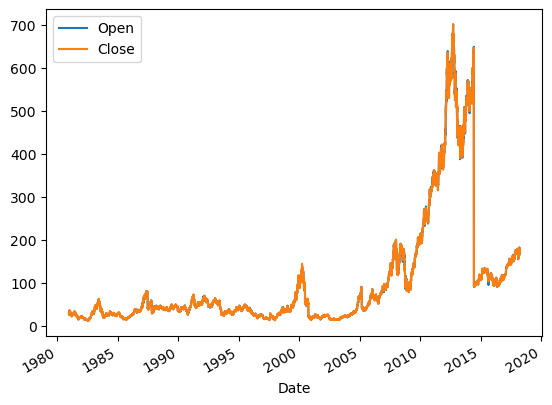

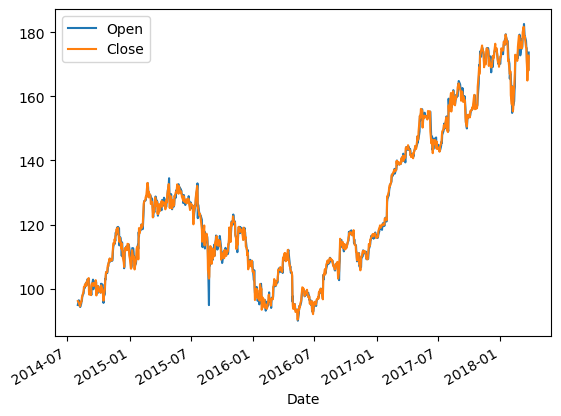

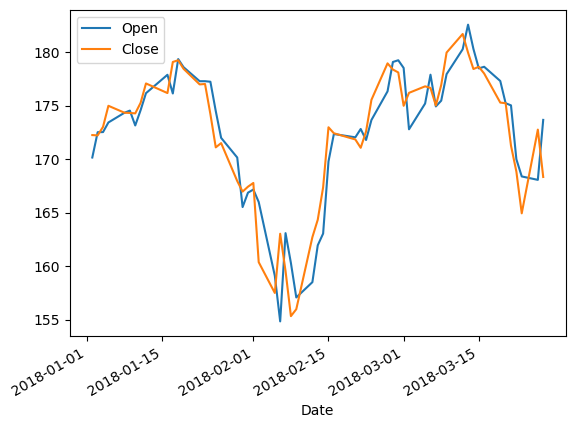

In [6]:
columns = ['Open', 'Close']

df[columns].plot()
plt.show()

df.loc['2014-08':][columns].plot()
plt.show()

df.loc['2018'][columns].plot()
plt.show()

### Exercises
---
**1. Create a dataframe** `q1` **with just the stock data from January to April 2014**

In [7]:
q1 = df.loc['2014-01':'2014-03']

**2. Create a line plot of the closing price during Q1**

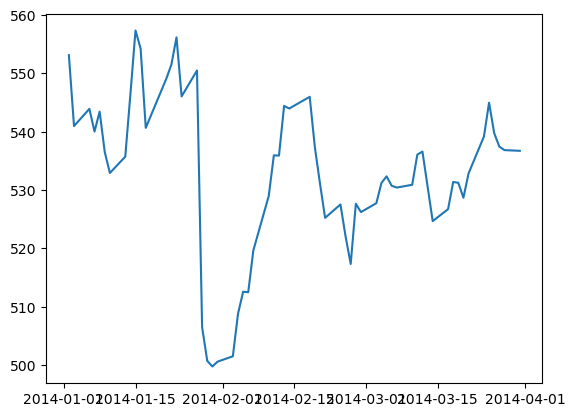

In [8]:
plt.plot(q1.index, q1['Close'])
plt.show()

**3. What was the averaging closing price of AAPL during Q1? How does that compare to the average price for Q1 of 2015?**

In [9]:
df.loc['2014-01':'2014-03']['Close'].mean()

df.loc['2015-01':'2015-03']['Close'].mean()

120.77672131147541

**4. What was the lowest closing price of AAPL in 2015? When did the lowest closing price occur?**

Hint: You can use the Numpy function `.idxmin()` to find the index of the min argument, and likewise for `.idxmax()`

In [10]:
print(df.loc['2015', 'Close'].min())
print(df.loc['2015', 'Close'].idxmin())


df.loc['2015', 'Close'].agg(['min', 'idxmin'])

103.12
2015-08-24 00:00:00


min                    103.12
idxmin    2015-08-24 00:00:00
Name: Close, dtype: object

## Matplotlib

**1. Use pyplot to plot the 2014 July-to-December closing prices of Apple.**  
- Use a red line to plot the data
- Rotate the x-axis tick labels 45 degrees and align them to the right.
- Set the x-axis label to 'Closing date' with font size 14.
- Set the y-axis label to 'Closing price' with font size 14.

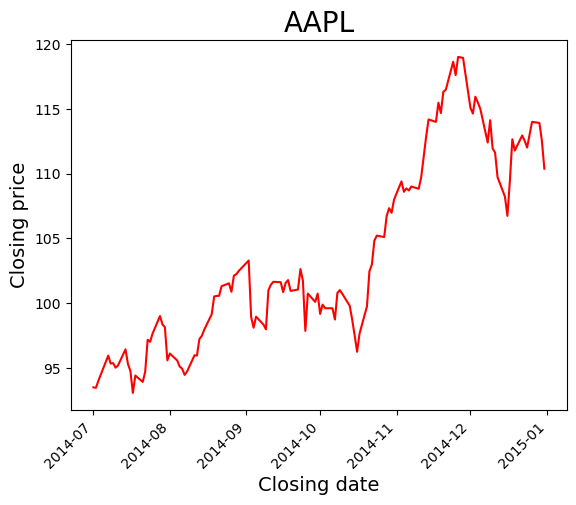

In [11]:
plt.plot(df.loc['2014-07':'2014-12','Close'], 'r-')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Closing date', fontsize=14)
plt.ylabel('Closing price', fontsize=14)
plt.title('AAPL', fontsize=20)
plt.show()

**2. Use subplots to show a low/high plot of Apple with volume below it.**  
- Show a legend.
- Label your axes.

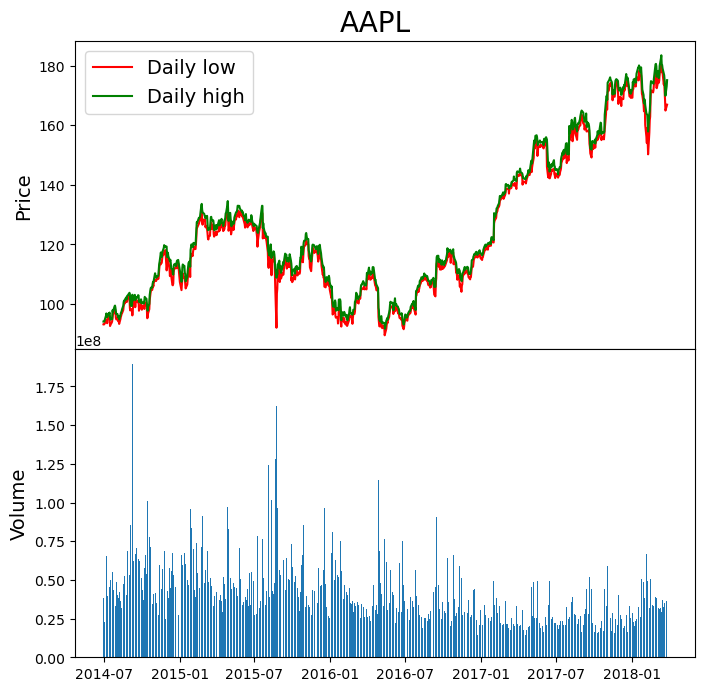

In [12]:
fig = plt.figure(figsize=(8,8))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(df.loc['2014-07':,'Low'], 'r-', label='Daily low')
ax1.plot(df.loc['2014-07':, 'High'], 'g-', label='Daily high')
ax1.set_ylabel('Price', fontsize=14)
ax1.legend(fontsize=14)

ax2 = fig.add_subplot(2,1,2)
ax2.bar(df.loc['2014-07':].index, df.loc['2014-07':, 'Volume'], width=1.)
ax2.set_ylabel('Volume', fontsize=14)

fig.subplots_adjust(wspace=0., hspace=0.)
fig.suptitle('AAPL', fontsize=20, y=0.92)
plt.show()

### A gridspec example, if you're up for it:  
**Use subplots and gridspec to show a low/high plot of Apple with volume below it.**  
- Make the plot-height ratio of price:volume 2:1.
- Show a legend.
- Label your axes.

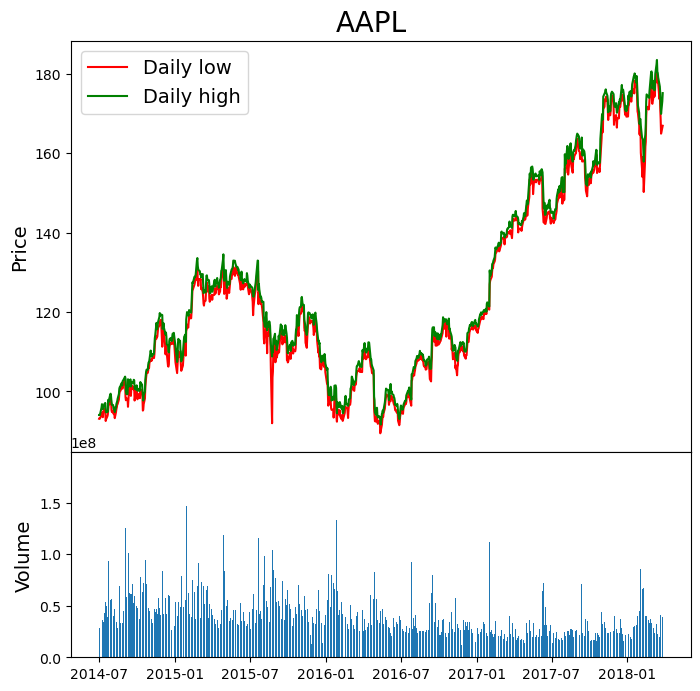

In [13]:
fig = plt.figure(figsize=(8,8))
gs=fig.add_gridspec(3,1)

ax1 = fig.add_subplot(gs[0:2,0])
ax1.plot(df.loc['2014-07':,'Low'], 'r-', label='Daily low')
ax1.plot(df.loc['2014-07':, 'High'], 'g-', label='Daily high')
ax1.set_ylabel('Price', fontsize=14)
ax1.legend(fontsize=14)

ax2 = fig.add_subplot(gs[2,0])
ax2.bar(df.loc['2014-07':].index, df.loc['2014-07':, 'Volume'], width=1.)
ax2.set_ylabel('Volume', fontsize=14)

fig.subplots_adjust(wspace=0., hspace=0.)
fig.suptitle('AAPL', fontsize=20, y=0.92)
plt.show()

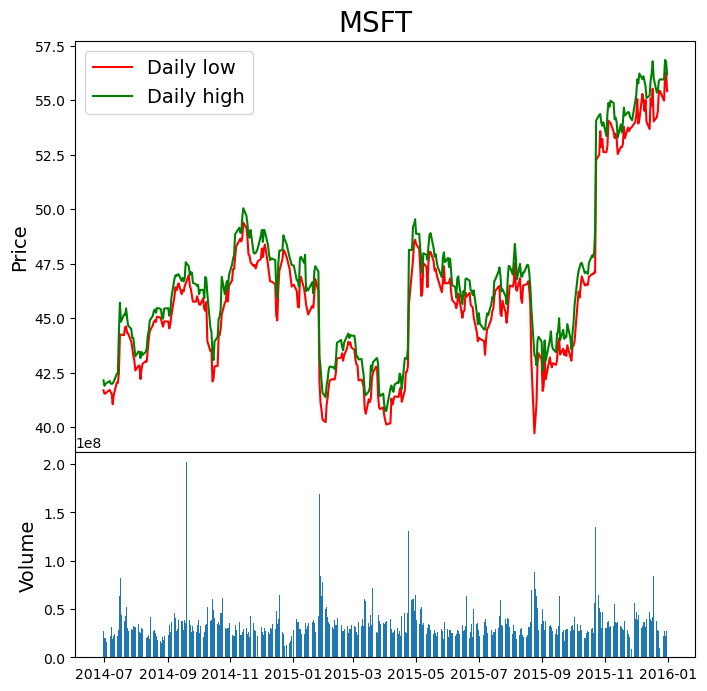

In [14]:
def stock_plt(ticker, start, end):
    url = "https://data.nasdaq.com/api/v3/datasets/WIKI/" \
          + ticker.upper() + ".csv"
    query_string = "?api_key=K2km7t6m9xhmYRD7zCPY"
    df = pd.read_csv(url+query_string, 
                     parse_dates=['Date'],
                     index_col='Date')
    df.sort_values('Date', inplace=True, ascending=True)
    
    fig = plt.figure(figsize=(8,8))
    gs=fig.add_gridspec(3,1)

    ax1 = fig.add_subplot(gs[0:2,0])
    ax1.plot(df.loc[start:end,'Low'], 'r-', label='Daily low')
    ax1.plot(df.loc[start:end, 'High'], 'g-', label='Daily high')
    ax1.set_ylabel('Price', fontsize=14)
    ax1.legend(fontsize=14)

    ax2 = fig.add_subplot(gs[2,0])
    ax2.bar(df.loc[start:end].index, df.loc[start:end, 'Volume'], width=1.)
    ax2.set_ylabel('Volume', fontsize=14)

    fig.subplots_adjust(wspace=0., hspace=0.)
    fig.suptitle(ticker, fontsize=20, y=0.92)
    plt.show()
    
    return None

stock_plt('MSFT', '2014-07', '2015-12')

**3. Use `hist_returns` from the following cell to create a histogram of the Apple's daily returns from July to December in 2014.**

In [15]:
returns = list(df.iloc[1:]['Close'].values / df.iloc[:-1]['Close'].values-1)
returns = np.array([float('nan')]+returns)
df['Daily return']=returns

hist_returns = df.loc['2014-07':, 'Daily return'].values

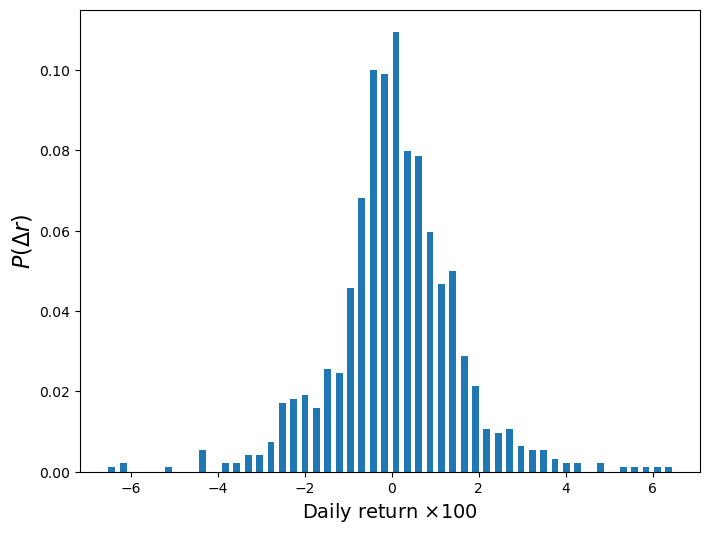

In [16]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.hist(hist_returns*100., bins=50, rwidth=0.6, 
        weights=np.repeat(1./len(hist_returns), len(hist_returns)))
ax.set_ylabel('$P(\Delta r)$', fontsize=16)
ax.set_xlabel('Daily return $\\times 100$', fontsize=14)
plt.show()

**4. Use the housing dataframe `dfh` from the following cell to inspect the relationship between crime and proximity to the city.**  
- Include a grid in your plot.

In [17]:
dfh = pd.read_csv("housing_prices.csv")

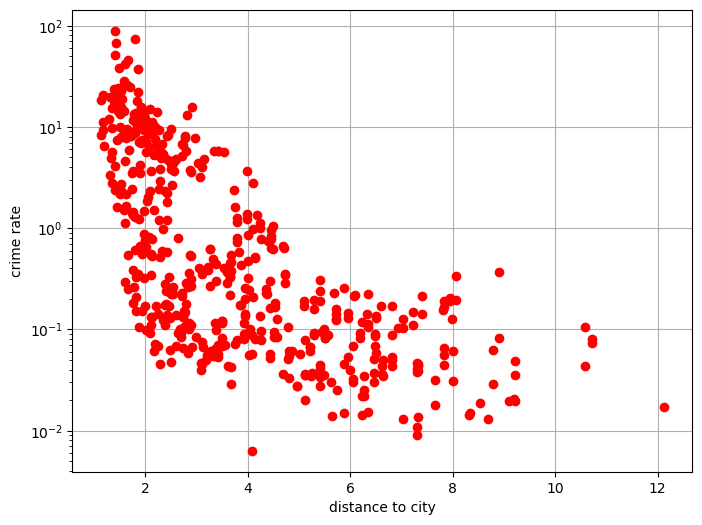

In [18]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(dfh['distance_to_city'], dfh['crime_rate'], 'ro')
ax.set_yscale('log')
ax.set_ylabel('crime rate')
ax.set_xlabel('distance to city')
ax.grid()
plt.show()